<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/NLP-Zero-to-Hero/blob/master/4.%20AI_to_create_poetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks

`
https://www.youtube.com/watch?v=ZMudJXhsUpY
`

### LSTM

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt \
    -O /tmp/irish-lyrics-eof.txt

--2020-05-28 17:39:33--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘/tmp/irish-lyrics-eof.txt’

/tmp/irish-lyrics-e 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2020-05-28 17:39:33 (90.5 MB/s) - ‘/tmp/irish-lyrics-eof.txt’ saved [68970/68970]



In [2]:
#importing lib/modules required
import tensorflow as tf
import keras 

#modules for padding and tokenizing
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

#modules for creating a RNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.optimizers import Adam



Using TensorFlow backend.


In [3]:
#instance of tokenizer 
tokenizer = Tokenizer()

#loading data
data = open('/tmp/irish-lyrics-eof.txt').read()

#splitting the corpus into different lines using \n char
corpus = data.lower().split('\n')

#fit corpus to the tokenizer
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#displaying the data
print(tokenizer.word_index)
print(total_words)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

here we are using entire corpus to predict the upcoming words instead of using validation set data

for padding sentences we need a zero token hence we add it and count as token( + 1 in total_words)

In [4]:
#generation of text
input_sequences = [] 
for line in corpus:
  # each line we create the list of corpus
  # we're not going to text seq for the enitre body
  # we're going to it one line at a time
  token_list = tokenizer.texts_to_sequences([line])[0]
  # above loc will give the text seq for the current line
  for i in range(1, len(token_list)):
    # we'll tokenize them
    n_gram_sequence = token_list[:i + 1]
    # the line we tokenized is represented by a list of numbers
    # but we can split that into other list
    # like the first two, first three  ans so on
    '''
    [51, 12, 96, 1217, 48, 2, 69] as

    [51, 12]
    [51, 12, 96]
    [51, 12, 96, 1217]
    [51, 12, 96, 1217, 48]
    [51, 12, 96, 1217, 48, 2]
    [51, 12, 96, 1217, 48, 2, 69]

    reason: we want to train a model to predict the likely
            next word

            so for each sentence we have, we can train it
            for when you see this word, this one is next 
            when you see this two word, this one is next and so on

    '''

    input_sequences.append(n_gram_sequence)

input_sequences

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361],
 [2, 11, 15, 31, 361, 8],
 [2, 11, 15, 31, 361, 8, 24],
 [2, 11, 15, 31, 361, 8, 24, 1218],
 [272, 798],
 [272, 798, 2],
 [272, 798, 2, 204],
 [272, 798, 2, 204, 24],
 [272, 798, 2, 204, 24, 579],
 [272, 798, 2, 204, 24, 579, 69],
 [118, 35],
 [118, 35, 119],
 [118, 35, 119, 799],
 [118, 35, 119, 799, 56],
 [118, 35, 119, 799, 56, 24],
 [118, 35, 119, 799, 56, 24, 184],
 [10, 184],
 [10, 184, 25],
 [10, 184, 25, 23],
 [10, 184, 25, 23, 5],
 [10, 184, 25, 23, 5, 580],
 [10, 184, 25, 23, 5, 580, 456],
 [2, 184],
 [2, 184, 800],
 [2, 184, 800, 12],
 [2, 184, 800, 12, 801],
 [2, 184, 800, 12, 801, 4],
 [2, 184, 800, 12, 801, 4, 7],
 [2, 184, 800, 12, 801, 4, 7, 235],
 [1219, 17],
 [1219, 17, 12],
 [1219, 17, 12, 75],
 [1219, 17, 12, 75, 1220],
 [1219, 17, 12, 75, 1220, 236],
 [1219, 17, 12, 75, 1

In [5]:
import numpy as np
#padding sequences
max_sequence_len = max([len(x) for x in input_sequences])
# splitting the sentences into multiple lists and we pad it
# with the max len sentence
'''
[   0    0    0 ...    0   51   12]
[   0    0    0 ...   51   12   96]
[   0    0    0 ...   12   96 1217]

max len sentence  = 16

[   features/input:x (0    0    0 ...    0   51 ), labels: 12]
[   features/input:x (0    0    0 ...   51   12 ), labels: 96]
so on

'''

input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

print(max_sequence_len)
print(input_sequences)

16
[[   0    0    0 ...    0   51   12]
 [   0    0    0 ...   51   12   96]
 [   0    0    0 ...   12   96 1217]
 ...
 [   0    0    0 ...    0   47  105]
 [   0    0    0 ...   47  105  138]
 [   0    0    0 ...  105  138  184]]


In [6]:
# creating predictiors and labels
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
# slicing [:,:-1] from starting to last but one
# slicing [:,-1] last one
print(xs)
print(labels)

[[  0   0   0 ...   0   0  51]
 [  0   0   0 ...   0  51  12]
 [  0   0   0 ...  51  12  96]
 ...
 [  0   0   0 ...   0   0  47]
 [  0   0   0 ...   0  47 105]
 [  0   0   0 ...  47 105 138]]
[  12   96 1217 ...  105  138  184]


In [7]:
# we want y to categorical and use one hot encoding
# so when we train we'll be able to predict across all of
# the words in our corpus which one to most likely 
# word to be next in the sequence,  given the currrent set of words
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)
ys[0]

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [8]:
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

8
1
71
6
713
39
1790
1791


In [9]:
print(xs[6])
print(ys[6])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]
[0. 0. 0. ... 0. 0. 0.]


In [10]:
print(xs[5])
print(ys[5])

[   0    0    0    0    0    0    0    0    0   51   12   96 1217   48
    2]
[0. 0. 0. ... 0. 0. 0.]


In [11]:
# word_index of entire corpus
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [12]:
# creating a neural network model and trian it

model = Sequential()
model.add(Embedding(total_words, 240, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))

adam = Adam(lr = 0.01)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history  = model.fit(xs,ys,epochs = 100, verbose = 1)

Epoch 1/100
377/377 [==============================] - 4s 11ms/step - loss: 6.6449 - accuracy: 0.0756
Epoch 2/100
377/377 [==============================] - 4s 11ms/step - loss: 5.7478 - accuracy: 0.1146
Epoch 3/100
377/377 [==============================] - 4s 11ms/step - loss: 4.9371 - accuracy: 0.1601
Epoch 4/100
377/377 [==============================] - 4s 11ms/step - loss: 4.1726 - accuracy: 0.2157
Epoch 5/100
377/377 [==============================] - 4s 11ms/step - loss: 3.4410 - accuracy: 0.2946
Epoch 6/100
377/377 [==============================] - 4s 11ms/step - loss: 2.8618 - accuracy: 0.3752
Epoch 7/100
377/377 [==============================] - 4s 11ms/step - loss: 2.4154 - accuracy: 0.4492
Epoch 8/100
377/377 [==============================] - 4s 11ms/step - loss: 2.0697 - accuracy: 0.5149
Epoch 9/100
377/377 [==============================] - 4s 11ms/step - loss: 1.8377 - accuracy: 0.5621
Epoch 10/100
377/377 [==============================] - 4s 11ms/step - loss: 1.671

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 15, 240)           645600    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               469200    
_________________________________________________________________
dense (Dense)                (None, 2690)              809690    
Total params: 1,924,490
Trainable params: 1,924,490
Non-trainable params: 0
_________________________________________________________________


In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

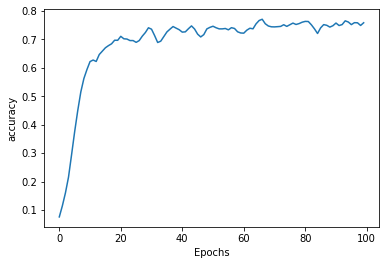

In [16]:
plot_graphs(history, 'accuracy')

In [17]:
seed_text = "I've got a bad feeling about this"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list], maxlen = max_sequence_len, padding = 'pre')
  predicted = model.predict_classes(token_list, verbose = 0)
  output_word = ''
  
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += ' ' + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
I've got a bad feeling about this darling since parting with you cry of smiling everywhere boots and ribbons locks of hair and gone out by the sky above why alas was ever fond since by night but no more grow but find why proud old ground love light weeping vale of tralee die or gown shells cold journey taken under sure twas losing dub row de dow corporal casey with sinking june isle union ye run bell but want oer the belles they may blarney delight union rich but of spancil hiii over when at home it is writin down by the salley gardens with little
